# Consolidación de la base de datos meteorológica con todas las fuentes disponibles 

## Metodología de la consolidación

## Metodología para tratamiento de los datos en esta investigación para preparar los datos para el algoritmo SARIMAX  
1. Lista de atributos o variables meteorológicas. 
     * Temperatura máxima diaria (°C)
     * Temperatura mínima diaria (°C)
     * Temperatura media diaria (°C)
     * Humedad relativa media diaria (%)
     * Humedad específica diaria (kg/kg o g/kg)
     * Velocidad del viento media diaria (m/s)
     * Velocidad del viento máxima diaria (m/s)
     * Velocidad del viento mínima diaria (m/s)
     * Precipitación diaria (mm)
     * Días con lluvia por semana epidemiológica
     * Radiación ultravioleta diaria (UV index)

2. Lista de atributos o variables Epidemiológicas.
     - Casos diarios de dengue.
        - Número de casos de dengue en Caucasia (N_Casos_Total)
        - Número de casos de dengue por barrio (N_Casos_Barrio)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

3. Obtener los datos meteorológicos: 
     - NASAPOWER

Importación de datos de la NASA POWER

In [44]:
# Importar datos
df_nasa=pd.read_csv(r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Datos meteorológicos\NASA POWER\Datos_NS_2021-2024.csv", sep=';')
df_nasa

,YEAR,DOY,T2M,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS2M,WS2M_MAX,WS2M_MIN,UV
0,2021,1,28.38,34.96,23.58,16.62,71.66,3.59,0.14,0.24,0.02,2.48
1,2021,2,27.44,33.39,23.64,17.98,80.54,12.12,0.10,0.23,0.04,2.18
2,2021,3,28.64,35.09,23.84,17.89,75.41,4.03,0.14,0.32,0.07,2.48
3,2021,4,28.48,35.05,23.69,15.91,68.69,0.70,0.14,0.25,0.07,2.47
4,2021,5,27.84,34.96,22.71,15.16,68.47,0.62,0.16,0.34,0.03,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2024,362,25.83,28.78,23.57,18.48,88.70,2.16,0.19,0.46,0.04,1.79
1457,2024,363,26.05,29.56,23.60,19.30,91.31,9.07,0.14,0.31,0.06,1.51
1458,2024,364,24.92,26.19,23.93,19.24,96.95,8.35,0.15,0.38,0.03,1.70
1459,2024,365,25.11,27.89,23.30,18.50,92.34,1.89,0.13,0.36,0.01,1.65


4. Renombrar los atributos por fuente.

In [45]:
# Renombrar columnas del dataframe nasa
df_nasa.rename(columns={
    'YEAR': 'año', 'DOY': 'dia',
    'T2M': 'temp (NASA)',
    'T2M_MAX': 'temp_max (NASA)',
    'T2M_MIN': 'temp_min (NASA)',
    'QV2M': 'hum_esp (NASA)',
    'RH2M': 'hum_rel (NASA)',
    'PRECTOTCORR': 'prec (NASA)',
    'WS2M': 'vel_vi (NASA)',
    'WS2M_MAX': 'vel_vi_max (NASA)',
    'WS2M_MIN': 'vel_vi_min (NASA)',
    'UV': 'uv (NASA)'
}, inplace=True)
df_nasa

,año,dia,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA)
0,2021,1,28.38,34.96,23.58,16.62,71.66,3.59,0.14,0.24,0.02,2.48
1,2021,2,27.44,33.39,23.64,17.98,80.54,12.12,0.10,0.23,0.04,2.18
2,2021,3,28.64,35.09,23.84,17.89,75.41,4.03,0.14,0.32,0.07,2.48
3,2021,4,28.48,35.05,23.69,15.91,68.69,0.70,0.14,0.25,0.07,2.47
4,2021,5,27.84,34.96,22.71,15.16,68.47,0.62,0.16,0.34,0.03,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2024,362,25.83,28.78,23.57,18.48,88.70,2.16,0.19,0.46,0.04,1.79
1457,2024,363,26.05,29.56,23.60,19.30,91.31,9.07,0.14,0.31,0.06,1.51
1458,2024,364,24.92,26.19,23.93,19.24,96.95,8.35,0.15,0.38,0.03,1.70
1459,2024,365,25.11,27.89,23.30,18.50,92.34,1.89,0.13,0.36,0.01,1.65


5. Ordenar los datos meteorológicos cronológicamente en formato DD-MM-AAAA

In [46]:
# Asegurar que las columnas 'año' y 'dia' sean numéricas 
df_nasa["año"] = df_nasa["año"].astype(int)
df_nasa["dia"] = df_nasa["dia"].astype(int)

# Crear la columna 'fecha' combinando año y día del año 
df_nasa["fecha"] = pd.to_datetime(df_nasa["año"].astype(str), format="%Y") + pd.to_timedelta(df_nasa["dia"] - 1, unit="D")

# Eliminar las columnas originales 'año' y 'dia'
df_nasa = df_nasa.drop(columns=["año", "dia"])

# Reordenar las columnas para que 'fecha' quede al inicio 
cols = ["fecha"] + [c for c in df_nasa.columns if c != "fecha"]
df_nasa = df_nasa[cols]

# Ordenar cronológicamente 
df_nasa = df_nasa.sort_values("fecha").reset_index(drop=True)

df_nasa.head()


,fecha,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA)
0,2021-01-01,28.38,34.96,23.58,16.62,71.66,3.59,0.14,0.24,0.02,2.48
1,2021-01-02,27.44,33.39,23.64,17.98,80.54,12.12,0.10,0.23,0.04,2.18
2,2021-01-03,28.64,35.09,23.84,17.89,75.41,4.03,0.14,0.32,0.07,2.48
3,2021-01-04,28.48,35.05,23.69,15.91,68.69,0.70,0.14,0.25,0.07,2.47
4,2021-01-05,27.84,34.96,22.71,15.16,68.47,0.62,0.16,0.34,0.03,2.30


6. Obtener los datos epidemiológicos

In [48]:
# Cargar datos epidemiológicos (2021-2024)
df_casos = pd.read_excel(r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Secretaria de salud\BD_DENGUE_SEC_SALUD_2021-2024.xlsx")
df_casos

,cod_eve,fec_not,semana,año,cod_pre,cod_sub,edad_,uni_med_,nacionali_,nombre_nacionalidad,...,nom_upgd,npais_proce,ndep_proce,nmun_proce,npais_resi,ndep_resi,nmun_resi,ndep_notif,nmun_notif,nreg
0,210,2021-01-11,1,2021,515402201,1,40,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,EL BAGRE,COLOMBIA,ANTIOQUIA,EL BAGRE,ANTIOQUIA,CAUCASIA,1800
1,210,2021-02-06,5,2021,515402201,1,12,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,ZARAGOZA,COLOMBIA,ANTIOQUIA,ZARAGOZA,ANTIOQUIA,CAUCASIA,1791
2,210,2021-02-12,6,2021,2548885069,80,25,1,170,COLOMBIA,...,SIN INFORMACIÓN,COLOMBIA,CUNDINAMARCA,NILO,COLOMBIA,ANTIOQUIA,CAUCASIA,SIN INFORMACIÓN,SIN INFORMACIÓN,1798
3,210,2021-02-16,3,2021,526605568,10,38,1,170,COLOMBIA,...,SIN INFORMACIÓN,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,ANTIOQUIA,ENVIGADO,SIN INFORMACIÓN,SIN INFORMACIÓN,1793
4,210,2021-02-19,6,2021,526605568,10,54,1,170,COLOMBIA,...,SIN INFORMACIÓN,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,BOGOTA,BOGOTA,SIN INFORMACIÓN,SIN INFORMACIÓN,1795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,210,2024-12-30,52,2024,515402201,1,6,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2025-01-01 00:00:00
5486,210,2024-12-31,49,2024,515415510,1,9,1,170,COLOMBIA,...,BIOMED VIDA SAS,COLOMBIA,ANTIOQUIA,ZARAGOZA,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2024-12-31 00:00:00
5487,210,2024-12-31,52,2024,515415510,1,42,1,170,COLOMBIA,...,BIOMED VIDA SAS,COLOMBIA,ANTIOQUIA,MEDELLIN,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2024-12-31 00:00:00
5488,210,2024-12-31,52,2024,515403817,1,2,1,170,COLOMBIA,...,CLINICA PAJONAL LIMITADA,COLOMBIA,ANTIOQUIA,CACERES,COLOMBIA,ANTIOQUIA,CACERES,ANTIOQUIA,CAUCASIA,2025-01-07 00:00:00


# Práctica de resampling  

### **1. Definición clave:**
- **Semana epidemiológica** (según INS):
  - Comienza en **domingo** y termina en **sábado**.

### **2. Criterio recomendado para el remuestreo:**
1. **Frecuencia de agrupación:**  
   Usar `'W-SUN'` en pandas para alinear las semanas de domingo a sábado.

2. **Función de agregación:**  
   - **Para variables acumulativas** (ej: precipitación):  
     ```python
     df.resample('W-SUN').sum()
     ```
   - **Para variables promedio** (ej: temperatura):  
     ```python
     df.resample('W-SUN').mean()
     ```
   - **Para extremos** (ej: temperatura máxima):  
     ```python
     df.resample('W-SUN').max()
     ```

3. **Etiquetado de fechas:**  
   Asignar cada semana a la **fecha de inicio (domingo)** para mantener consistencia epidemiológica:
   ```python
   df_semanal = df.resample('W-SUN', label='left').sum()
   ```

---

### **3. Implementación en Python:**

In [54]:
# 1. Copiar dataframe original 
df = df_nasa.copy()

# 2. Asegurar que la columna 'fecha' es tipo datetime 
df["fecha"] = pd.to_datetime(df["fecha"])

# 3. Crear columna binaria: día con lluvia (1 si Prec ≥ 1 mm) 
df["lluvia"] = (df["prec (NASA)"] >= 1).astype(int)

# 4. Definir la fecha como índice temporal 
df = df.set_index("fecha")

# 5. Remuestrear de diario a semanal (domingo a sábado) 
df_semanal = df.resample("W-SAT").agg({
    "temp (NASA)": "mean",
    "temp_max (NASA)": "mean",
    "temp_min (NASA)": "mean",
    "hum_esp (NASA)": "mean",
    "hum_rel (NASA)": "mean",
    "prec (NASA)": "sum",        # total semanal de precipitación
    "lluvia": "sum",             # número de días con lluvia
    "vel_vi (NASA)": "mean",
    "vel_vi_max (NASA)": "mean",
    "vel_vi_min (NASA)": "mean",
    "uv (NASA)": "mean"
})

# 6. Renombrar la nueva variable 
df_semanal = df_semanal.rename(columns={"lluvia": "dias_con_lluvia"})

# 7. Reiniciar índice para que 'fecha' vuelva a ser columna
df_semanal = df_semanal.reset_index()

# 8. Agregar número de semana epidemiológica
df_semanal["semana_epidemiologica"] = df_semanal["fecha"].dt.isocalendar().week

# 9. Reordenar las columnas para que la semana quede al lado de la fecha
columnas = ["fecha", "semana_epidemiologica"] + [
    col for col in df_semanal.columns if col not in ["fecha", "semana_epidemiologica"]
]
df_semanal = df_semanal[columnas]

df_semanal.head()


,fecha,semana_epidemiologica,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),dias_con_lluvia,vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA)
0,2021-01-02,53,27.910000,34.175000,23.610000,17.300000,76.100000,15.71,2,0.120000,0.235000,0.030000,2.330000
1,2021-01-09,1,28.252857,34.200000,23.832857,16.308571,70.508571,5.72,1,0.121429,0.244286,0.047143,2.222857
2,2021-01-16,2,28.687143,34.910000,24.195714,17.318571,72.885714,19.15,5,0.117143,0.208571,0.038571,2.254286
3,2021-01-23,3,29.592857,36.372857,24.090000,16.112857,65.122857,0.77,0,0.124286,0.225714,0.045714,2.420000
4,2021-01-30,4,29.190000,35.978571,24.200000,16.511429,68.068571,12.92,4,0.122857,0.220000,0.035714,2.477143


## Unión de las bases de datos

In [62]:
# Copiar los df originales
df_casos_ = df_casos.copy()
df_meteo_ = df_semanal.copy()

# Asegurar que las fechas estén en formato datetime
df_casos_["fec_not"] = pd.to_datetime(df_casos_["fec_not"])
df_meteo_["fecha"] = pd.to_datetime(df_meteo_["fecha"])

# Crear columnas de año y semana epidemiológica a partir de fec_not
df_casos_["anio"] = df_casos_["fec_not"].dt.isocalendar().year
df_casos_["semana_epidemiologica"] = df_casos_["fec_not"].dt.isocalendar().week

# Agrupar los casos por año y semana epidemiológica
df_casos_semana = (
    df_casos_
    .groupby(["anio", "semana_epidemiologica"])
    .size()
    .reset_index(name="casos_dengue")
)

# Preparar base meteorológica semanal
df_meteo_["anio"] = df_meteo_["fecha"].dt.year

# Unir ambas bases por año y semana epidemiológica
df_final = pd.merge(
    df_meteo_,
    df_casos_semana,
    on=["anio", "semana_epidemiologica"],
    how="left"
)

# Rellenar semanas sin casos con 0
df_final["casos_dengue"] = df_final["casos_dengue"].fillna(0).astype(int)

# Reordenar columnas: fecha, semana, casos, y luego las variables climáticas
columnas = ["fecha", "semana_epidemiologica", "casos_dengue"] + [
    col for col in df_final.columns if col not in ["fecha", "semana_epidemiologica", "casos_dengue", "anio"]
]

df_final = df_final[columnas]

# Ver primeras filas
df_final.head()


,fecha,semana_epidemiologica,casos_dengue,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),dias_con_lluvia,vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA)
0,2021-01-02,53,0,27.910000,34.175000,23.610000,17.300000,76.100000,15.71,2,0.120000,0.235000,0.030000,2.330000
1,2021-01-09,1,0,28.252857,34.200000,23.832857,16.308571,70.508571,5.72,1,0.121429,0.244286,0.047143,2.222857
2,2021-01-16,2,1,28.687143,34.910000,24.195714,17.318571,72.885714,19.15,5,0.117143,0.208571,0.038571,2.254286
3,2021-01-23,3,0,29.592857,36.372857,24.090000,16.112857,65.122857,0.77,0,0.124286,0.225714,0.045714,2.420000
4,2021-01-30,4,0,29.190000,35.978571,24.200000,16.511429,68.068571,12.92,4,0.122857,0.220000,0.035714,2.477143


## Prueba de normalidad

In [67]:
from scipy.stats import shapiro

# Seleccionar solo las columnas numéricas
numericas = df_final.select_dtypes(include=["float64", "int64"])

# Aplicar Shapiro-Wilk a cada variable
resultados_normalidad = {}
for col in numericas.columns:
    stat, p = shapiro(numericas[col].dropna())
    resultados_normalidad[col] = {"Estadístico W": stat, "Valor p": p}

# Mostrar resultados
df_normalidad = pd.DataFrame(resultados_normalidad).T
df_normalidad["Normal (p>0.05)"] = df_normalidad["Valor p"] > 0.05
df_normalidad


,Estadístico W,Valor p,Normal (p>0.05)
casos_dengue,0.866598,1.312834e-12,False
temp (NASA),0.944396,3.212551e-07,False
temp_max (NASA),0.908450,4.447641e-10,False
temp_min (NASA),0.984249,1.928965e-02,False
hum_esp (NASA),0.953381,2.421801e-06,False
hum_rel (NASA),0.858170,4.743952e-13,False
prec (NASA),0.871709,2.486737e-12,False
dias_con_lluvia,0.902200,1.688682e-10,False
vel_vi (NASA),0.972908,4.507791e-04,False
vel_vi_max (NASA),0.943663,2.747344e-07,False


Matriz de correlación de Spearman:

                   casos_dengue  temp (NASA)  temp_max (NASA)  \
casos_dengue           1.000000    -0.280399        -0.350856   
temp (NASA)           -0.280399     1.000000         0.953041   
temp_max (NASA)       -0.350856     0.953041         1.000000   
temp_min (NASA)        0.069856     0.693237         0.496170   
hum_esp (NASA)         0.609483    -0.511504        -0.658962   
hum_rel (NASA)         0.479109    -0.858971        -0.941632   
prec (NASA)            0.263578    -0.585330        -0.654137   
dias_con_lluvia        0.301368    -0.652843        -0.713499   
vel_vi (NASA)          0.488108    -0.672869        -0.691100   
vel_vi_max (NASA)      0.495731    -0.674555        -0.682460   
vel_vi_min (NASA)     -0.177665     0.261683         0.262864   
uv (NASA)             -0.250364     0.215042         0.135902   

                   temp_min (NASA)  hum_esp (NASA)  hum_rel (NASA)  \
casos_dengue              0.069856        0.6094

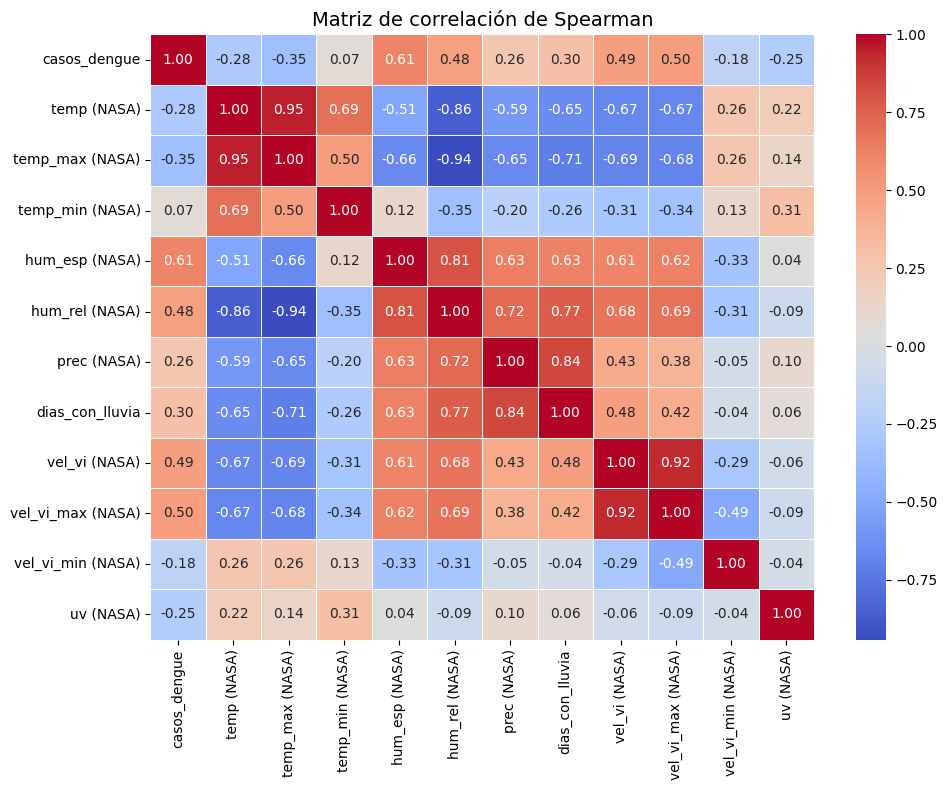

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numerico = df_final.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Spearman
corr_spearman = df_numerico.corr(method='spearman')

# Mostrar matriz en consola
print("Matriz de correlación de Spearman:\n")
print(corr_spearman)

# Mostrar correlación de cada variable con casos de dengue
print("\nCorrelación de Spearman con casos de dengue:\n")
print(corr_spearman['casos_dengue'].sort_values(ascending=False))

# Crear el mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_spearman, 
    annot=True,       # Muestra los valores en el mapa
    cmap='coolwarm',  # Escala de color
    fmt=".2f",        # Formato de los valores
    linewidths=0.5
)
plt.title('Matriz de correlación de Spearman', fontsize=14)
plt.tight_layout()
plt.show()
